In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/mushrooms.csv')

In [4]:
X=df.drop('class', axis=1)
X=pd.get_dummies(data=X,drop_first=True)

In [5]:
y=df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grad_model=GradientBoostingClassifier()

In [13]:
n_estimators=[50,100]

param_grid={'n_estimators':n_estimators, 'learning_rate':[0.1,0.05,0.2], 'max_depth':[3,4,5]}

In [14]:
grid= GridSearchCV(grad_model, param_grid)

In [15]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [18]:
predictions=grid.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [16]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [22]:
confusion_matrix(y_test,predictions)

array([[444,   0],
       [  1, 368]], dtype=int64)

In [23]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 9.58322387e-17, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.68661908e-03, 3.75281001e-16, 6.72173930e-16,
       0.00000000e+00, 3.63337620e-17, 1.59759988e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.98836577e-18,
       2.44684069e-03, 5.45299677e-02, 1.30525988e-04, 1.07273460e-02,
       2.07370954e-02, 2.56568724e-04, 6.15607813e-01, 6.24984488e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26781551e-02,
       1.18700538e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.18710640e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.84095603e-04, 3.72420500e-04, 1.28992452e-01, 3.03211335e-03,
       3.57777981e-02, 2.95999592e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.02566191e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.28757931e-04, 0.00000000e+00,
      

In [24]:
feat_impt= grid.best_estimator_.feature_importances_

In [33]:
imp_feat=pd.DataFrame(index=X.columns,data=feat_impt, columns=['Importances'])

In [34]:
imp_feat.head()

,Importances
cap-shape_c,1.719903e-04
cap-shape_f,9.583224e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 [Text(0, 0, 'stalk-surface-above-ring_y'),
  Text(1, 0, 'spore-print-color_y'),
  Text(2, 0, 'gill-color_u'),
  Text(3, 0, 'gill-color_w'),
  Text(4, 0, 'gill-color_y'),
  Text(5, 0, 'stalk-surface-above-ring_s'),
  Text(6, 0, 'stalk-surface-below-ring_k'),
  Text(7, 0, 'stalk-color-above-ring_c'),
  Text(8, 0, 'stalk-color-above-ring_e'),
  Text(9, 0, 'stalk-color-above-ring_g'),
  Text(10, 0, 'stalk-color-above-ring_o'),
  Text(11, 0, 'stalk-surface-below-ring_s'),
  Text(12, 0, 'stalk-color-above-ring_y'),
  Text(13, 0, 'stalk-color-above-ring_p'),
  Text(14, 

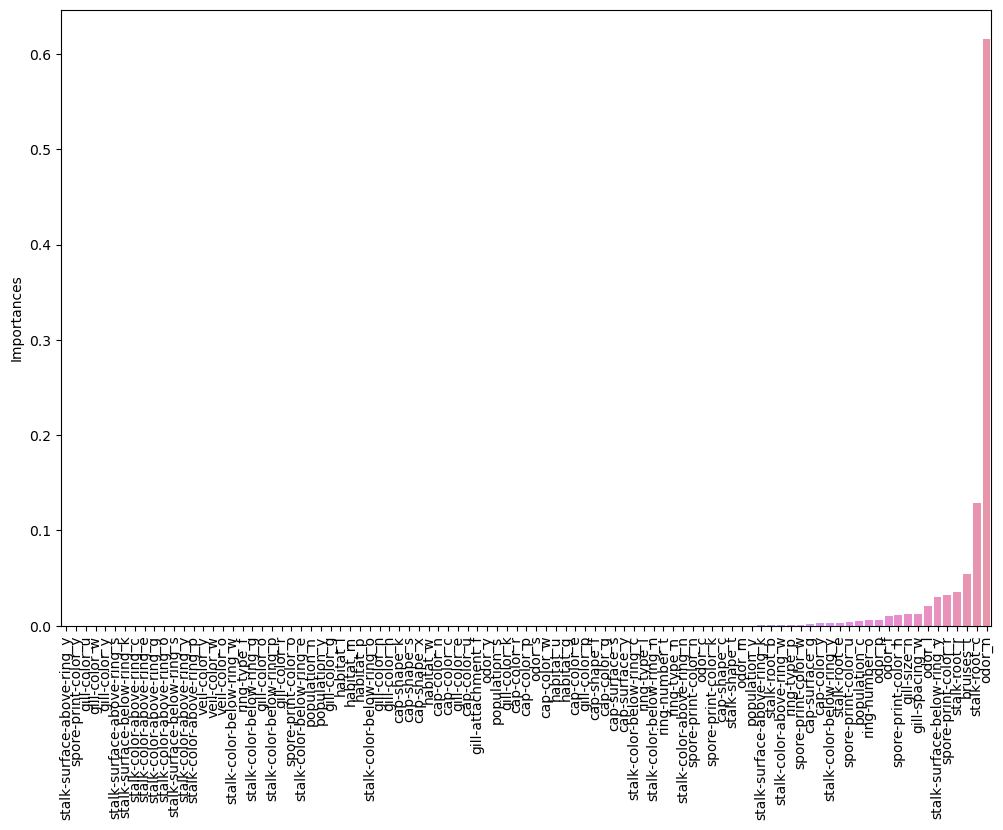

In [39]:
plt.figure(figsize=(12,8))
imp_feat=imp_feat.sort_values('Importances')
sns.barplot(x=imp_feat.index,data=imp_feat,y='Importances')
plt.xticks(rotation=90)